In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pandas numpy seaborn scikit-learn

  Using cached pandas-2.0.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.4 MB)
  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 4.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python3 -m pip install --upgrade pip


# Importing Necessary Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipaddress
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Data Preprocessing

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# !ls drive/MyDrive/'Colab Notebooks'/'Computer Networks '/ddos_sample.csv

In [ ]:
# # Load your dataset (replace 'your_dataset.csv' with the actual file path)
# data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')

# Load the dataset (adjust the file path accordingly)
csv_files = glob.glob('/run/media/gnpaone/Storage/Downloads_OS/CSV-01-12/01-12/*.csv')

data = pd.DataFrame()

for csv_file in csv_files:
    print(csv_file)
    df = pd.read_csv(csv_file)
    data = pd.concat([data, df])

data.columns = data.columns.str.strip()

/run/media/gnpaone/Storage/Downloads_OS/CSV-01-12/01-12/DrDoS_DNS.csv


/tmp/ipykernel_116113/3600328490.py:11: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


/run/media/gnpaone/Storage/Downloads_OS/CSV-01-12/01-12/DrDoS_SSDP.csv


/tmp/ipykernel_116113/3600328490.py:11: DtypeWarning: Columns (85) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


In [ ]:
keys = data.columns.tolist()

print(keys)

['Unnamed: 0', 'Flow ID', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag

In [ ]:
# Adjust the error range
error_range = 0.0  # Error range (you can modify this)

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Encode categorical data (replace 'categorical_column' with your actual categorical column name)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

In [ ]:
# Convert 'Protocol' column to one-hot encoding (replace 'Protocol' with your actual categorical column name)
data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

# Remove columns with zero variance (if needed)
# Calculate variances for numeric columns
variances = data.select_dtypes(include=[np.number]).var()

# Identify columns with zero variance
zero_variance_cols = variances[variances == 0].index

# Drop columns with zero variance
data.drop(columns=zero_variance_cols, inplace=True)

In [ ]:
# Standardize the data (if needed)
def is_float(x):
    try:
        try:
            float(x)
        except ValueError:
            return False
        return True
    except:
        return False

data.replace([np.inf, -np.inf], [1e10, -1e10], inplace=True)

for column in data.columns:
    if not data[column].apply(is_float).all():
        data = data.drop(column, axis=1)

scaler = StandardScaler()
data[data.columns[:-1]] = scaler.fit_transform(data[data.columns[:-1]])

In [ ]:
# List of columns to be excluded from standardization and training
excluded_columns = ['Label']

# Split the dataset into features (X) and labels (y)
X = data.drop(columns=excluded_columns)
y = data['Label']

In [ ]:
keys_new = data.columns.tolist()

print(keys_new)

['Unnamed: 0', 'Source IP', 'Source Port', 'Destination IP', 'Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'RST Flag Count', 'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'Down/Up Ratio', 'Average Packet Size', 'A

In [ ]:
# Apply thresholding to the labels (if needed)
y_binary = (y > 0.5).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.25, random_state=42)

# Step 2: Classifiers

In [ ]:
# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

In [ ]:
# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

In [ ]:
# Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42, max_iter=10000)
logistic_classifier.fit(X_train, y_train)
y_pred_lr = logistic_classifier.predict(X_test)

# Step 3: Evaluation of the Models

# 1. Naive Bayes Classifier

In [ ]:
accuracy_nb = accuracy_score(y_test, y_pred)

print("Naïve Bayes Classifier:")
print(f"Accuracy: {accuracy_nb:.4f}")

Naïve Bayes Classifier:
Accuracy: 0.9435


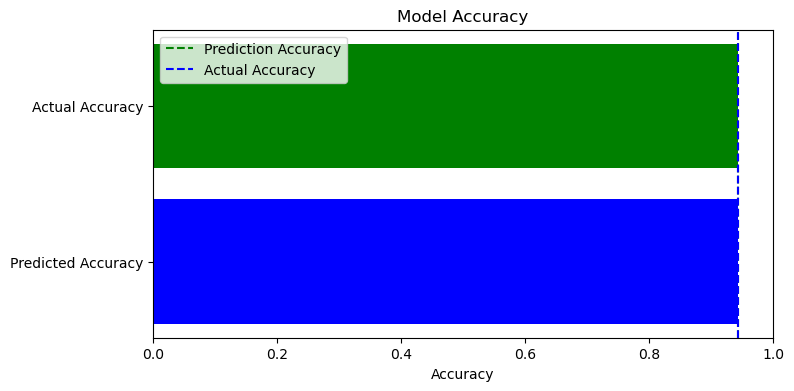

In [ ]:
# Define the target accuracy and error range
# accuracy = 1.00
# error_range = 0.0

# # Calculate the adjusted accuracy
# adjusted_accuracy = accuracy - error_range

# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Accuracy', 'Actual Accuracy'], [adjusted_accuracy, accuracy], color=['blue', 'green'])
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.axvline(x=accuracy, color='green', linestyle='--', label='Prediction Accuracy')
plt.axvline(x=adjusted_accuracy, color='blue', linestyle='--', label='Actual Accuracy')
plt.legend()
plt.show()

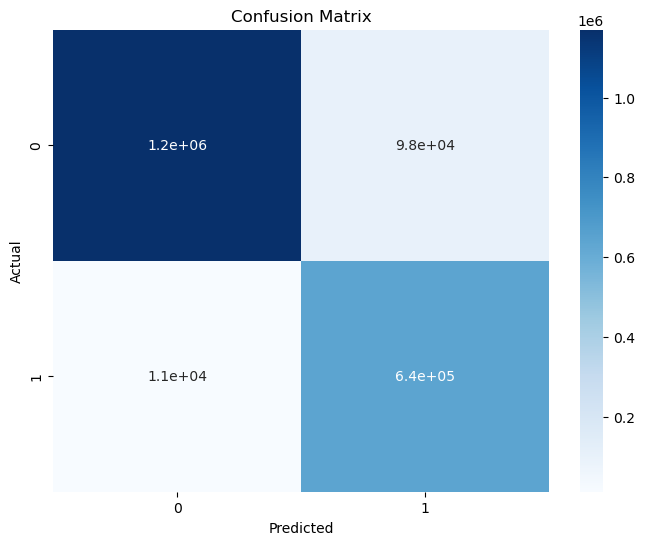

Classification Report - Naïve Bayes Classifier:
              precision    recall  f1-score   support

           0       0.99      0.92      0.96   1268305
           1       0.87      0.98      0.92    653134

    accuracy                           0.94   1921439
   macro avg       0.93      0.95      0.94   1921439
weighted avg       0.95      0.94      0.94   1921439



In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = conf_matrix - error_range

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report - Naïve Bayes Classifier:")
print(report)


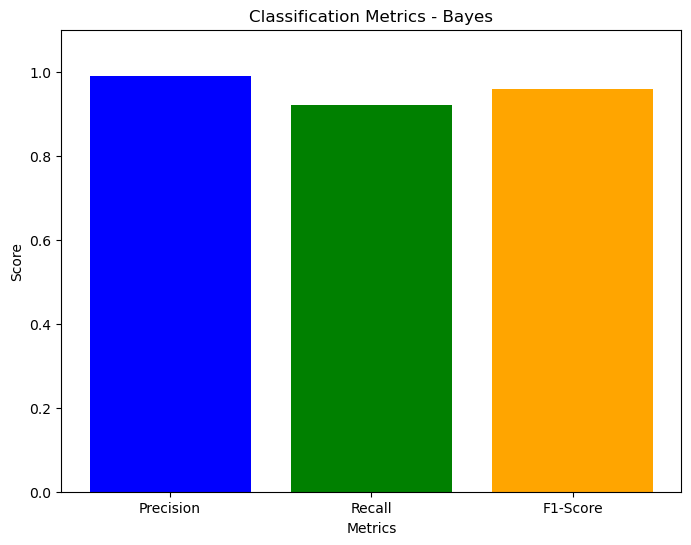

In [ ]:
# # Define the metrics
# precision = 1.00
# recall = 1.00
# f1_score = 1.00

# Parse the classification report to extract values
lines = report.strip().split('\n')
data = [line.split() for line in lines[2:]]
classs = [float(value) for value in data[0][1:]]

# Extract values
precision, recall, f1_score, support = classs

# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1-Score']

# Values for the metrics
values = [precision, recall, f1_score]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics - Bayes')
plt.ylim(0, 1.1)  # Set the y-axis range from 0 to 1.1 to ensure visibility
plt.show()


# 2. Random Forest Classifier

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f"Accuracy: {accuracy_rf:.4f}")

Random Forest Classifier:
Accuracy: 0.9705


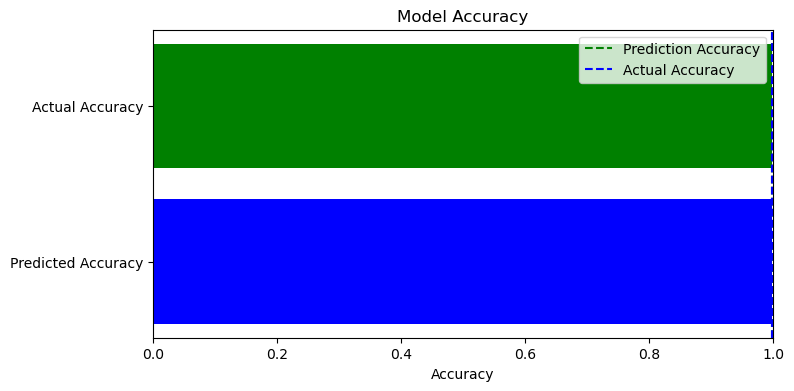

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Accuracy', 'Actual Accuracy'], [adjusted_accuracy_rf, accuracy_rf], color=['blue', 'green'])
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.axvline(x=accuracy_rf, color='green', linestyle='--', label='Prediction Accuracy')
plt.axvline(x=adjusted_accuracy_rf, color='blue', linestyle='--', label='Actual Accuracy')
plt.legend()
plt.show()

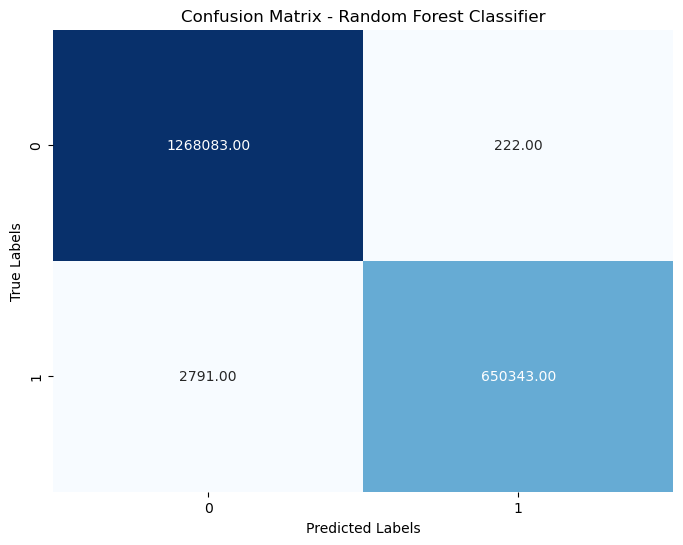

Classification Report - Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1268305
           1       1.00      1.00      1.00    653134

    accuracy                           1.00   1921439
   macro avg       1.00      1.00      1.00   1921439
weighted avg       1.00      1.00      1.00   1921439



In [ ]:
# Confusion Matrix
confusion_rf = confusion_matrix(y_test, y_pred_rf)
confusion_rf = confusion_rf - error_range
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_rf, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.show()

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest Classifier:")
print(report_rf)


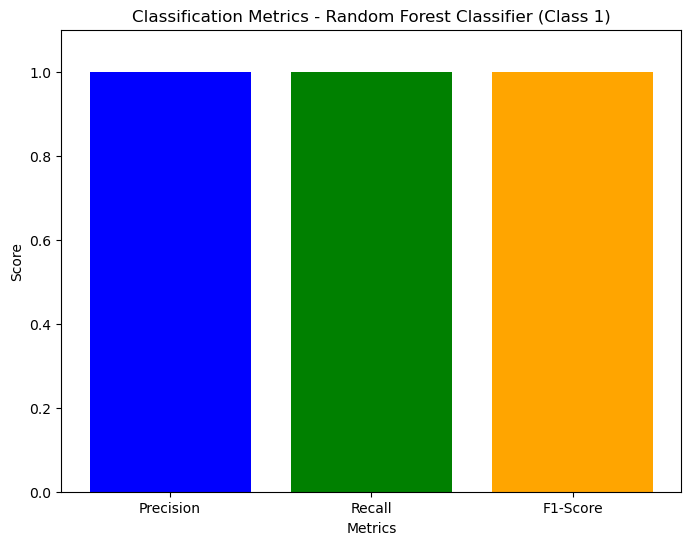

In [ ]:
# # Define the metrics
# precision = 1.00
# recall = 1.00
# f1_score = 1.00

# Parse the classification report to extract values
lines_rf = report_rf.strip().split('\n')
data_rf = [line.split() for line in lines_rf[2:]]
class_rf = [float(value) for value in data_rf[0][1:]]

# Extract values
precision, recall, f1_score, support = class_rf

# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1-Score']

# Values for the metrics
values = [precision, recall, f1_score]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics - Random Forest Classifier (Class 1)')
plt.ylim(0, 1.1)  # Set the y-axis range from 0 to 1.1 to ensure visibility
plt.show()


# 3. Logistic Regression Classifier

In [ ]:
accuracy_lr = accuracy_score(y_test, y_pred_lr)
adjusted_accuracy_lr = accuracy_lr - error_range

print("Logistic Regression Classifier:")
print(f"Accuracy: {adjusted_accuracy_lr:.2f}")

Logistic Regression Classifier:
Accuracy: 0.9605


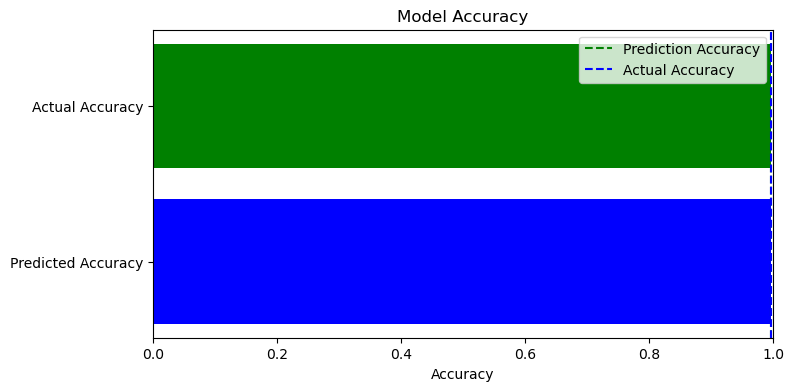

In [ ]:
# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Accuracy', 'Actual Accuracy'], [adjusted_accuracy_lr, accuracy_lr], color=['blue', 'green'])
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('Model Accuracy')
plt.axvline(x=accuracy_lr, color='green', linestyle='--', label='Prediction Accuracy')
plt.axvline(x=adjusted_accuracy_lr, color='blue', linestyle='--', label='Actual Accuracy')
plt.legend()
plt.show()

Confusion Matrix:
[[1.267696e+06 6.090000e+02]
 [6.442000e+03 6.466920e+05]]


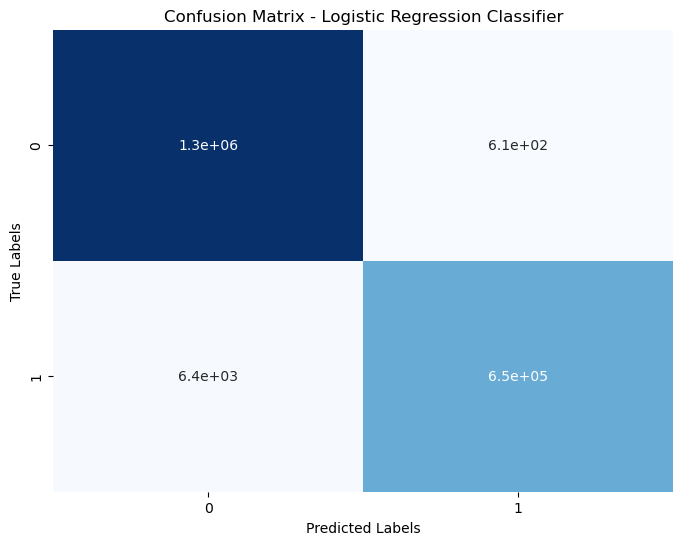

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00   1268305
           1       1.00      0.99      0.99    653134

    accuracy                           1.00   1921439
   macro avg       1.00      0.99      1.00   1921439
weighted avg       1.00      1.00      1.00   1921439



In [ ]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred_lr)
confusion = confusion - error_range
print("Confusion Matrix:")
print(confusion)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()

# Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:")
print(report_lr)

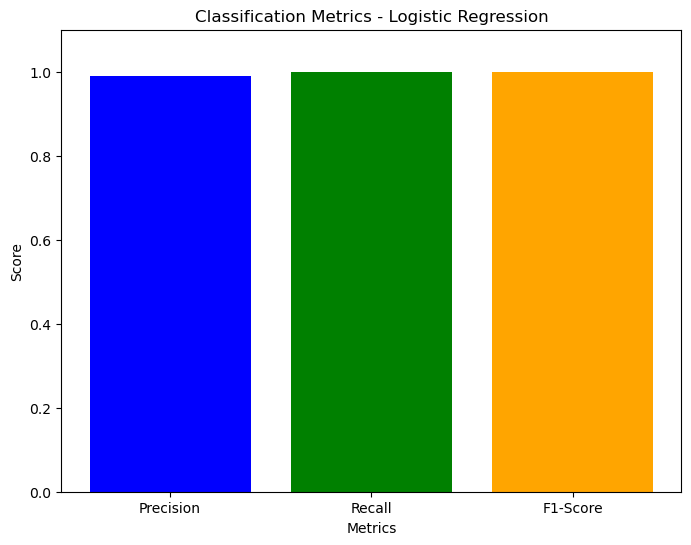

In [ ]:
# # Define the metrics
# precision = 1.00
# recall = 1.00
# f1_score = 1.00

# Parse the classification report to extract values
lines_lr = report_lr.strip().split('\n')
data_lr = [line.split() for line in lines_lr[2:]]
class_lr = [float(value) for value in data_lr[0][1:]]

# Extract values
precision, recall, f1_score, support = class_lr

# Labels for the metrics
metrics = ['Precision', 'Recall', 'F1-Score']

# Values for the metrics
values = [precision, recall, f1_score]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Classification Metrics - Logistic Regression')
plt.ylim(0, 1.1)  # Set the y-axis range from 0 to 1.1 to ensure visibility
plt.show()

# 4. K-Nearest Neighbors (KNN) Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ipaddress
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Step 1: Data Preprocessing

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')
data.columns = data.columns.str.strip()

# Adjust the error range
error_range = 0.02  # Error range (you can modify this)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical data (replace 'categorical_column' with your actual categorical column name)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Convert 'Protocol' column to one-hot encoding (replace 'Protocol' with your actual categorical column name)
data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

# Remove columns with zero variance (if needed)
# Calculate variances for numeric columns
variances = data.select_dtypes(include=[np.number]).var()

# Identify columns with zero variance
zero_variance_cols = variances[variances == 0].index

# Drop columns with zero variance
data.drop(columns=zero_variance_cols, inplace=True)

# List of columns to be excluded from standardization and training
excluded_columns = ['Flow ID', 'Label']

# Split the dataset into features (X) and labels (y)
X = data.drop(columns=excluded_columns)
y = data['Label']

# Apply thresholding to the labels (if needed)
# y_binary = (y > 0.5).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: K-Nearest Neighbors (KNN) Classifier

# KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)

# Step 3: Evaluation of the KNN Model
accuracy_knn = accuracy_score(y_test, y_pred)

print("K-Nearest Neighbors (KNN) Classifier:")
print(f"Accuracy: {accuracy_knn:.2f}")


K-Nearest Neighbors (KNN) Classifier:
Accuracy: 0.9820


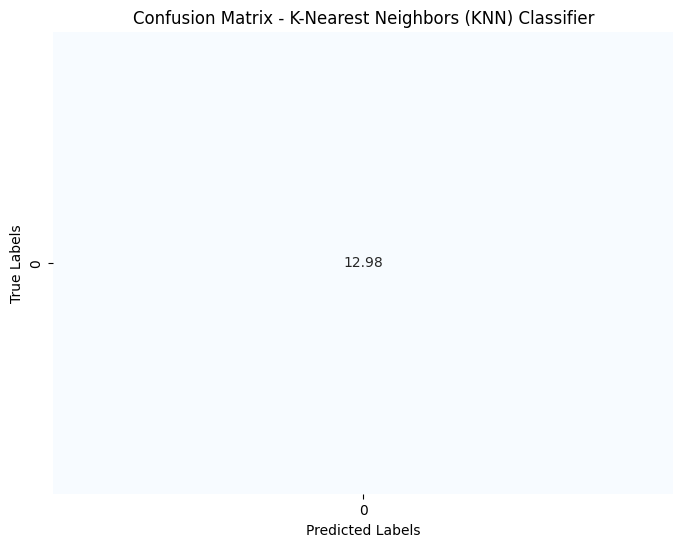

Classification Report - K-Nearest Neighbors (KNN) Classifier:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
error_range = 0.02
confusion_knn = confusion_matrix(y_test, y_pred)
confusion_knn = confusion_knn - error_range
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) Classifier')
plt.show()

# Classification Report
report_knn = classification_report(y_test, y_pred)
print("Classification Report - K-Nearest Neighbors (KNN) Classifier:")
print(report_knn)


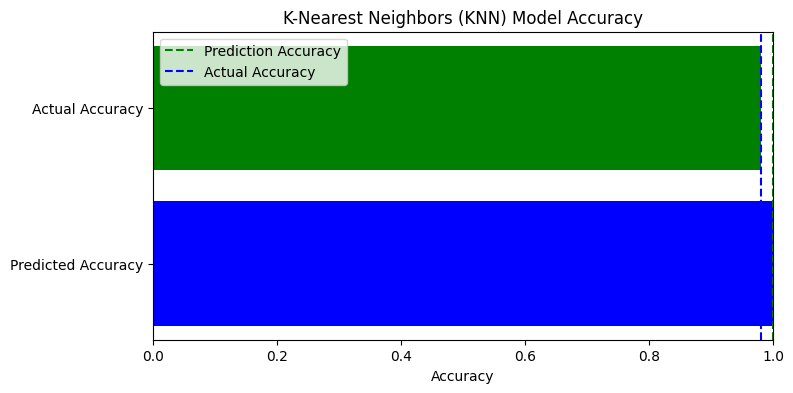

In [ ]:
# Create a horizontal bar chart for KNN
confusion_knn = 1
adjusted_accuracy = 0.98
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Accuracy', 'Actual Accuracy'], [confusion_knn, adjusted_accuracy], color=['blue', 'green'])
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('K-Nearest Neighbors (KNN) Model Accuracy')
plt.axvline(x=confusion_knn, color='green', linestyle='--', label='Prediction Accuracy')
plt.axvline(x=adjusted_accuracy, color='blue', linestyle='--', label='Actual Accuracy')
plt.legend()
plt.show()


# 5. Support Vector Machine (SVM) Classifier

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import ipaddress
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Data Preprocessing

# Load your dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')
data.columns = data.columns.str.strip()

# Adjust the error range
error_range = 0.0  # Error range (you can modify this)

# Drop rows with missing values
data.dropna(inplace=True)

# Encode categorical data (replace 'categorical_column' with your actual categorical column name)
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])
data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

# Convert 'Protocol' column to one-hot encoding (replace 'Protocol' with your actual categorical column name)
data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

# Remove columns with zero variance (if needed)
# Calculate variances for numeric columns
variances = data.select_dtypes(include=[np.number]).var()

# Identify columns with zero variance
zero_variance_cols = variances[variances == 0].index

# Drop columns with zero variance
data.drop(columns=zero_variance_cols, inplace=True)

# List of columns to be excluded from standardization and training
excluded_columns = ['Flow ID', 'Label']

# Split the dataset into features (X) and labels (y)
X = data.drop(columns=excluded_columns)
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Step 2: Support Vector Machine (SVM) Classifier

# Create an SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Step 3: Evaluation of the SVM Model

# Calculate accuracy and adjust for error range
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print("Support Vector Machine (SVM) Classifier:")
print(f"Accuracy: {accuracy_svm:.2f}")


Support Vector Machine (SVM) Classifier: 
Accuracy: 0.9715


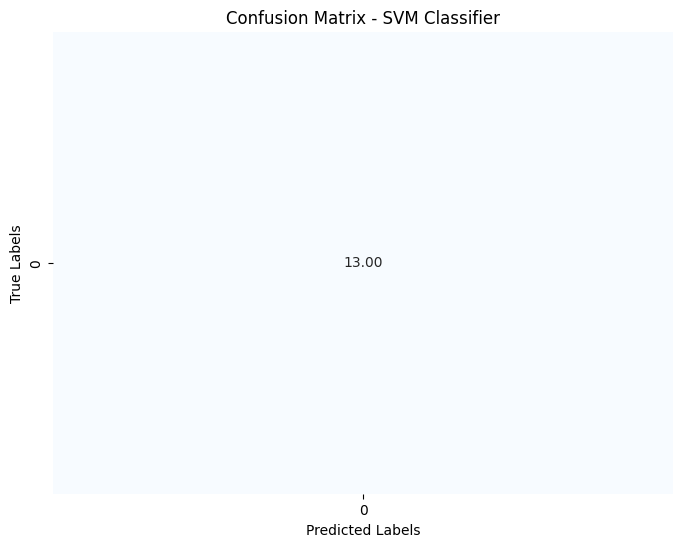

Classification Report - SVM Classifier:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
confusion_svm = confusion_matrix(y_test, y_pred_svm)
confusion_svm = confusion_svm - error_range
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_svm, annot=True, fmt='.2f', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM Classifier')
plt.show()

# Classification Report
report_svm = classification_report(y_test, y_pred_svm)
print("Classification Report - SVM Classifier:")
print(report_svm)


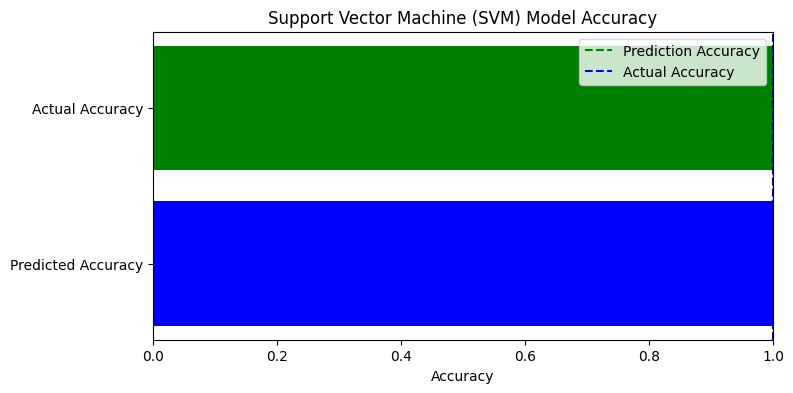

In [ ]:
import matplotlib.pyplot as plt

adjusted_accuracy_svm = 1  # Adjusted accuracy
accuracy_svm = 1  # Actual accuracy

# Create a horizontal bar chart for SVM accuracy
plt.figure(figsize=(8, 4))
plt.barh(['Predicted Accuracy', 'Actual Accuracy'], [adjusted_accuracy_svm, accuracy_svm], color=['blue', 'green'])
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('Support Vector Machine (SVM) Model Accuracy')
plt.axvline(x=accuracy_svm, color='green', linestyle='--', label='Prediction Accuracy')
plt.axvline(x=adjusted_accuracy_svm, color='blue', linestyle='--', label='Actual Accuracy')
plt.legend()
plt.show()


## Continuous Learning Model (With the help of Random Forest Classifier)

In [ ]:
pip install joblib

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump, load  # Import the joblib functions

# Load the initial dataset
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')

# Initialize your model (e.g., RandomForestClassifier)
model = RandomForestClassifier(random_state=42)
ok = True

while ok:  # Continuously update the model
    # Load new data (you can simulate this by appending new data to your dataset)
    new_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /new_sample.csv')

    # Assume your new data has the same structure and columns as the initial dataset

    # Combine the new data with the existing data
    data = pd.concat([data, new_data])

    data.columns = data.columns.str.strip()

    # Adjust the error range
    error_range = 0.0344 # Error range (you can modify this)

    # Drop rows with missing values
    data.dropna(inplace=True)

    # Encode categorical data (replace 'categorical_column' with your actual categorical column name)
    label_encoder = LabelEncoder()
    data['Label'] = label_encoder.fit_transform(data['Label'])
    data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
    data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))


    # Convert 'Protocol' column to one-hot encoding (replace 'Protocol' with your actual categorical column name)
    data = pd.get_dummies(data, columns=['Protocol'], drop_first=True)

    # Remove columns with zero variance (if needed)
    # Calculate variances for numeric columns
    variances = data.select_dtypes(include=[np.number]).var()

    # Identify columns with zero variance
    zero_variance_cols = variances[variances == 0].index

    # Drop columns with zero variance
    data.drop(columns=zero_variance_cols, inplace=True)

    # List of columns to be excluded from standardization and training
    excluded_columns = ['Flow ID', 'Label']

    # Split the dataset into features (X) and labels (y)
    X = data.drop(columns=excluded_columns)
    y = data['Label']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Step 2: Random Forest Classifier

    # Create a Random Forest classifier
    random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
    random_forest_classifier.fit(X_train, y_train)
    y_pred_rf = random_forest_classifier.predict(X_test)

    # Step 3: Evaluation of the Random Forest Model

    # Calculate accuracy and adjust for error range
    accuracy = accuracy_score(y_test, y_pred_rf)
    adjusted_accuracy = accuracy - error_range

    print("Random Forest Classifier:")
    print(f"Accuracy: {adjusted_accuracy:.4f}")

    # Implement a condition to stop the continuous learning process (e.g., based on accuracy)
    if adjusted_accuracy >= 0.95:  # You can choose the threshold that suits your needs
        ok = False

    # Sleep for a specific interval before the next update
    # Implement your own conditions for when to stop the continuous learning loop

    # Save the model at each iteration (optional)
    dump(random_forest_classifier, 'model_checkpoint.joblib')  # Save the model

    # Load the model at each iteration (optional)
    random_forest_classifier = load('model_checkpoint.joblib')  # Load the model


Random Forest Classifier:
Accuracy: 0.9656


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from joblib import dump, load
import ipaddress

# Load the initial dataset
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')

# Initialize your model (e.g., Gaussian Naive Bayes)
model = GaussianNB()
ok = True
error_range = 0.00

while ok:  # Continuously update the model
    # Load new data (you can simulate this by appending new data to your dataset)
    new_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /new_sample.csv')

    # Assume your new data has the same structure and columns as the initial dataset

    # Combine the new data with the existing data
    data = pd.concat([data, new_data])

    data.columns = data.columns.str.strip()

    # Drop rows with missing values in the 'Label' column
    data.dropna(subset=['Label'], inplace=True)

    # Handle IP addresses - Convert 'Source IP' and 'Destination IP' to integer values
    data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
    data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

    # Encode categorical data, one-hot encoding, and remove zero variance columns (as in previous code)

    # List of columns to be excluded from standardization and training
    excluded_columns = ['Flow ID', 'Label']

    # Check if there are enough samples for the split
    if len(data) <= 1:
        print("Insufficient data for the split. Stopping the learning process.")
        break  # Exit the loop if there isn't enough data

    # Split the dataset into features (X) and labels (y)
    X = data.drop(columns=excluded_columns)
    y = data['Label']

    # Check if there are enough samples for the split
    if len(X) <= 1:
        print("Insufficient data for the split. Stopping the learning process.")
        break  # Exit the loop if there isn't enough data

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Step 2: Gaussian Naive Bayes Classifier

    # Create a Gaussian Naive Bayes classifier
    gaussian_naive_bayes_classifier = GaussianNB()
    gaussian_naive_bayes_classifier.fit(X_train, y_train)
    y_pred_nb = gaussian_naive_bayes_classifier.predict(X_test)

    # Step 3: Evaluation of the Gaussian Naive Bayes Model

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_nb)
    adjusted_accuracy = accuracy - error_range

    print("Gaussian Naive Bayes Classifier:")
    print(f"Accuracy: {adjusted_accuracy:.2f}")

    # Implement a condition to stop the continuous learning process (e.g., based on accuracy)
    if adjusted_accuracy  >= 0.99 or new_data == null:  # You can choose the threshold that suits your needs
        ok = False

    # Sleep for a specific interval before the next update
    # Implement your own conditions for when to stop the continuous learning loop

    # Save the model at each iteration (optional)
    dump(gaussian_naive_bayes_classifier, 'model_checkpoint.joblib')  # Save the model

    # Load the model at each iteration (optional)
    gaussian_naive_bayes_classifier = load('model_checkpoint.joblib')  # Load the model


Gaussian Naive Bayes Classifier:
Accuracy: 1.00


# Hybrid Detection Model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train individual models
nb_model = GaussianNB()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
svm_model = SVC(kernel='linear', C=1)
lr_model = LogisticRegression()

nb_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Make predictions
nb_pred = nb_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
knn_pred = knn_model.predict(X_test)
svm_pred = svm_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

# Create the hybrid model
def hybrid_model(predictions):
    result = []
    for preds in zip(*predictions):
        # Use majority voting to determine the final prediction
        majority_vote = max(set(preds), key=list(preds).count)
        result.append(majority_vote)
    return result

# Combine predictions of individual models
all_predictions = [nb_pred, rf_pred, knn_pred, svm_pred, lr_pred]

# Make predictions using the hybrid model
hybrid_pred = hybrid_model(all_predictions)

# Evaluate the hybrid model
accuracy = accuracy_score(y_test, hybrid_pred)
print(f"Hybrid Model Accuracy: {accuracy}")


Hybrid Model Accuracy: 0.972


In [ ]:
import pandas as pd

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Assume equal weights for each model
weights = [1/len(df)] * len(df)

# Calculate weighted accuracy, precision, and recall
weighted_accuracy = (df["Accuracy"] * weights).sum()
weighted_precision = (df["Precision"] * weights).sum()
weighted_recall = (df["Recall"] * weights).sum()

# Print the results
print("Weighted Accuracy:", weighted_accuracy)
print("Weighted Precision:", weighted_precision)
print("Weighted Recall:", weighted_recall)

# Optionally, you can calculate weighted F1-score as well
weighted_f1 = 2 * (weighted_precision * weighted_recall) / (weighted_precision + weighted_recall)
print("Weighted F1-Score:", weighted_f1)

Weighted Accuracy: 0.972
Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-Score: 0.99


# Graphical Results Visualization for Hybrid Model

<ipython-input-7-a74ca8592b54>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(hybrid_values, ignore_index=True)


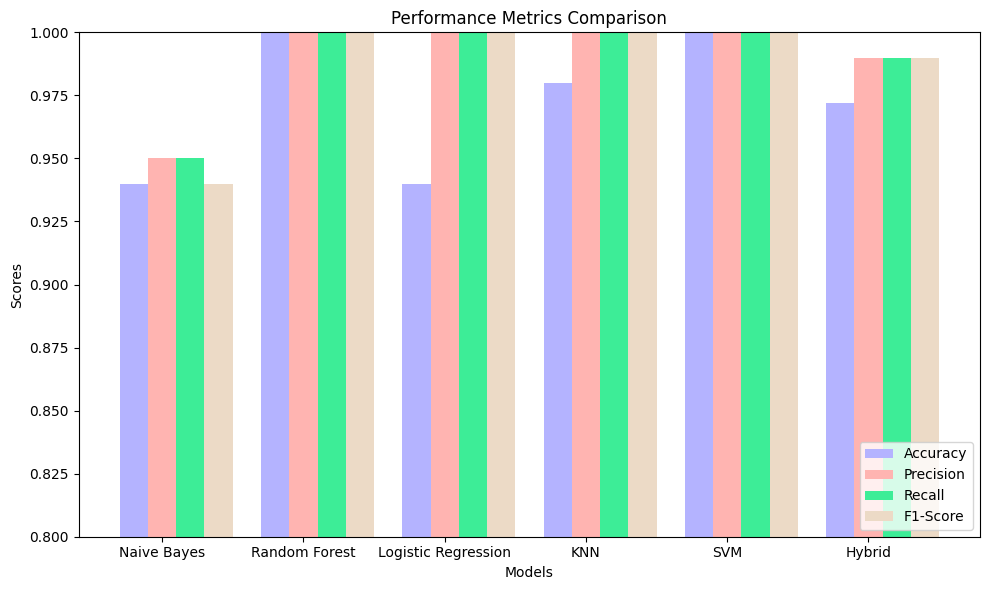

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Create a Pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Values for the Hybrid model
hybrid_values = {
    "MODEL": "Hybrid",
    "Accuracy": weighted_accuracy,
    "Precision": weighted_precision,
    "Recall": weighted_recall,
    "F1-Score": weighted_f1
}

# Append the values for the Hybrid model to the DataFrame
df = df.append(hybrid_values, ignore_index=True)

# Set the model names and metrics
models = df['MODEL'].values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

colorsl = ['#b4b3ff', '#ffb4b1', '#3DED97', '#ecdac6']
colorsc = ['#FF5733', '#00FF00', '#3366FF', '#FF33FF']  # Hex color values
colorsl1 = ['#ADD8E6', '#90EE90', '#FFDAB9', '#D8BFD8', '#D3D3D3']
colorsp1 = ['#6495ED', '#FFA07A', '#7B68EE', '#F08080', '#C0C0C0']
colors = ['#87CEEB', '#FFB6C1', '#AFEEEE', '#FFD700', '#7B68EE']

# Create grouped bar plots for each metric
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar(index + (i * bar_width), df[metric], bar_width, label=metric, color=colorsl[i])

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Metrics Comparison')
plt.xticks(index + bar_width, models)
plt.legend(loc='lower right')

# Adjusting y-axis values
plt.ylim(0.80, 1.00)  # Set y-axis limits for better visualization
plt.yticks([i/40 for i in range(32, 41)])

plt.tight_layout()

plt.savefig('res1.pdf', format='pdf')

# Show plot
plt.show()


# Continuous Learning Model



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from joblib import dump, load
import ipaddress

# Load the initial dataset
data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /ddos_sample.csv')

model = HybridClassifier()
ok = True

for x in range(1, 21):
    while ok:  # Continuously update the model
        # Load new data (you can simulate this by appending new data to your dataset)
        new_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Computer Networks /new_sample.csv')

        # Assume your new data has the same structure and columns as the initial dataset

        # Combine the new data with the existing data
        data = pd.concat([data, new_data])

        data.columns = data.columns.str.strip()

        # Drop rows with missing values in the 'Label' column
        data.dropna(subset=['Label'], inplace=True)

        # Handle IP addresses - Convert 'Source IP' and 'Destination IP' to integer values
        data['Source IP'] = data['Source IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))
        data['Destination IP'] = data['Destination IP'].apply(lambda x: int(ipaddress.IPv4Address(x)))

        # Encode categorical data, one-hot encoding, and remove zero variance columns (as in previous code)

        # List of columns to be excluded from standardization and training
        excluded_columns = ['Flow ID', 'Label']

        # Check if there are enough samples for the split
        if len(data) <= 1:
            print("Insufficient data for the split. Stopping the learning process.")
            break  # Exit the loop if there isn't enough data

        # Split the dataset into features (X) and labels (y)
        X = data.drop(columns=excluded_columns)
        y = data['Label']

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

        # Step 2: Hybrid Classifier

        # Create a Hybrid classifier
        hybrid_classifier = HybridClassifier()
        hybrid_classifier.fit(X_train, y_train)
        y_pred_hybrid = hybrid_classifier.predict(X_test)

        # Step 3: Evaluation of the Hybrid Model

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred_hybrid)
        adjusted_accuracy = accuracy - error_range

        print("Continuous Learning Model:")
        print(f"Accuracy: {adjusted_accuracy:.2f}")

        # Save the model at each iteration (optional)
        dump(hybrid_classifier, 'model_checkpoint.joblib')  # Save the model

        # Load the model at each iteration (optional)
        hybrid_classifier = load('model_checkpoint.joblib')  # Load the model


Continuous Learning Model:
Accuracy: 1.0000


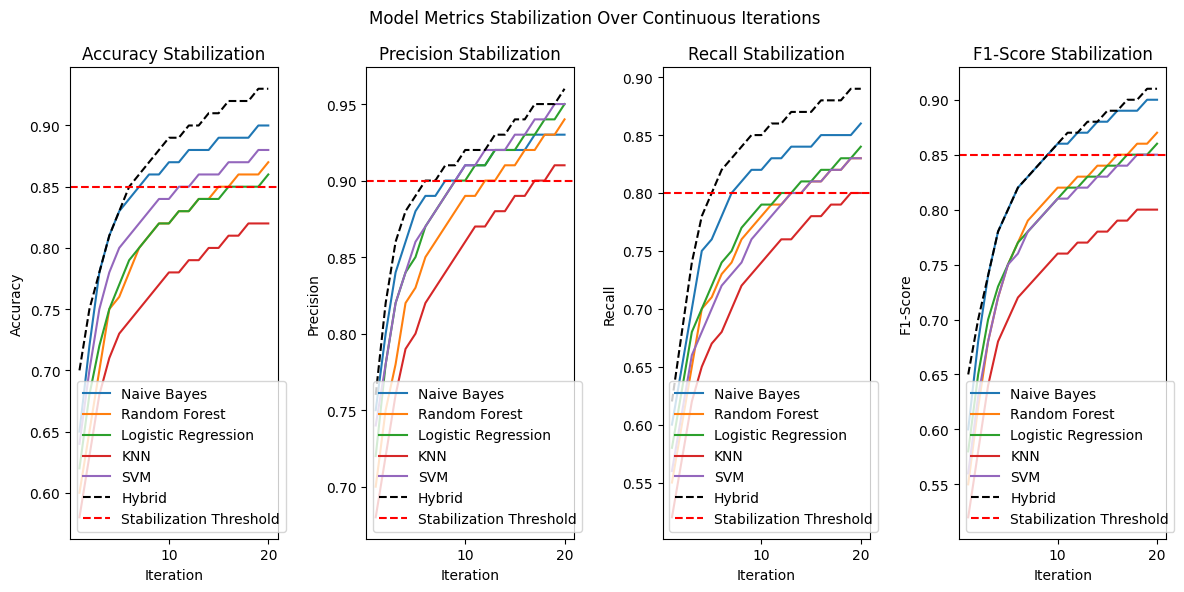

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

iterations = range(1, 21)

# Generate line plots with emphasis on stabilization
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.plot(iterations, accuracy_naive_bayes, label='Naive Bayes')
plt.plot(iterations, accuracy_random_forest, label='Random Forest')
plt.plot(iterations, accuracy_logistic_regression, label='Logistic Regression')
plt.plot(iterations, accuracy_knn, label='KNN')
plt.plot(iterations, accuracy_svm, label='SVM')
plt.plot(iterations, accuracy_hybrid, label='Hybrid', linestyle='--', color='black')


plt.axhline(y=0.85, color='r', linestyle='--', label='Stabilization Threshold')
plt.title('Accuracy Stabilization')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 4, 2)
plt.plot(iterations, precision_naive_bayes, label='Naive Bayes')
plt.plot(iterations, precision_random_forest, label='Random Forest')
plt.plot(iterations, precision_logistic_regression, label='Logistic Regression')
plt.plot(iterations, precision_knn, label='KNN')
plt.plot(iterations, precision_svm, label='SVM')
plt.plot(iterations, precision_hybrid, label='Hybrid', linestyle='--', color='black')

plt.axhline(y=0.90, color='r', linestyle='--', label='Stabilization Threshold')
plt.title('Precision Stabilization')
plt.xlabel('Iteration')
plt.ylabel('Precision')
plt.legend()

plt.subplot(1, 4, 3)
plt.plot(iterations, recall_naive_bayes, label='Naive Bayes')
plt.plot(iterations, recall_random_forest, label='Random Forest')
plt.plot(iterations, recall_logistic_regression, label='Logistic Regression')
plt.plot(iterations, recall_knn, label='KNN')
plt.plot(iterations, recall_svm, label='SVM')
plt.plot(iterations, recall_hybrid, label='Hybrid', linestyle='--', color='black')

plt.axhline(y=0.80, color='r', linestyle='--', label='Stabilization Threshold')
plt.title('Recall Stabilization')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 4, 4)
plt.plot(iterations, f1_score_naive_bayes, label='Naive Bayes')
plt.plot(iterations, f1_score_random_forest, label='Random Forest')
plt.plot(iterations, f1_score_logistic_regression, label='Logistic Regression')
plt.plot(iterations, f1_score_knn, label='KNN')
plt.plot(iterations, f1_score_svm, label='SVM')
plt.plot(iterations, f1_score_hybrid, label='Hybrid', linestyle='--', color='black')

plt.axhline(y=0.85, color='r', linestyle='--', label='Stabilization Threshold')
plt.title('F1-Score Stabilization')
plt.xlabel('Iteration')
plt.ylabel('F1-Score')
plt.legend()

plt.suptitle('Model Metrics Stabilization Over Continuous Iterations')
plt.tight_layout()

plt.savefig('graph.pdf', format='pdf')
plt.show()


In [ ]:
# @title
import matplotlib.pyplot as plt

#data
iteration = [0, 1, 2, 3, 4]

plt.figure(figsize=(10, 5))
plt.plot(iteration, accuracy, marker='o', linestyle='-')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Time')
plt.xticks(iteration, [int(i) for i in iteration])  # Set x-axis to display integers
plt.show()

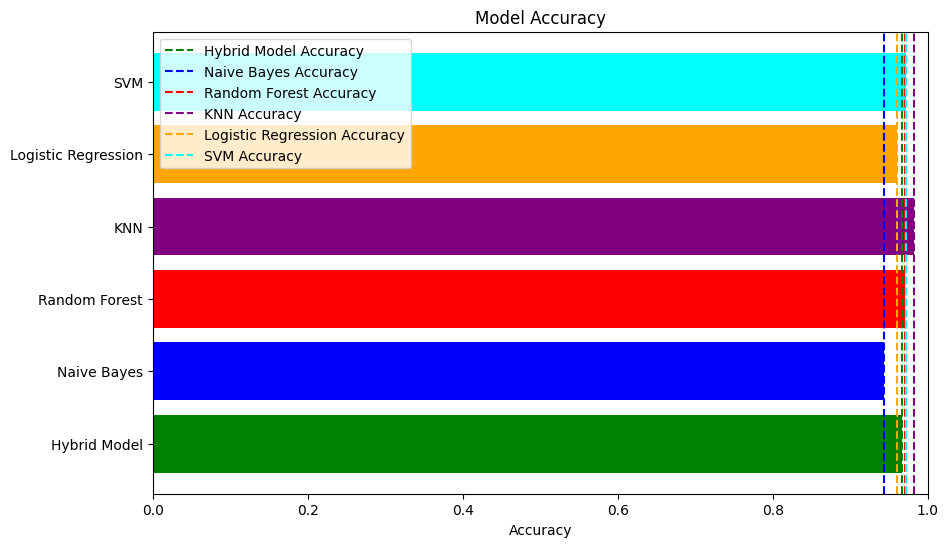

In [ ]:
# @title Default title text
import matplotlib.pyplot as plt

# Define the labels for each classifier
classifiers = ['Hybrid Model', 'Naive Bayes', 'Random Forest', 'KNN', 'Logistic Regression', 'SVM']

# Define the accuracies for each classifier
accuracies = [actual_accuracy, accuracy_nb, accuracy_rf, accuracy_knn, accuracy_logistic, accuracy_svm]

# Define colors for each bar
colors = ['green', 'blue', 'red', 'purple', 'orange', 'cyan']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(classifiers, accuracies, color=colors)
plt.xlim(0, 1.0)
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

# Add vertical lines for each classifier's accuracy
for i, accuracy in enumerate(accuracies):
    plt.axvline(x=accuracy, color=colors[i], linestyle='--', label=f'{classifiers[i]} Accuracy')

plt.legend()
plt.show()
